In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import warnings # 에러를 제거하는 라이브러리
warnings.filterwarnings('ignore')

### Hyper-Parameters Setting

In [2]:
input_size = 1 # 1차원을 의미한다
output_size = 1 # 1차원을 의미한다.
num_epochs = 100 # 100번 학습하겠다는 의미이다.
learning_rate = 0.001 # 0.001이 가장 대표적인 값이다 

In [3]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

x_train
y_train

array([[1.7  ],
       [2.76 ],
       [2.09 ],
       [3.19 ],
       [1.694],
       [1.573],
       [3.366],
       [2.596],
       [2.53 ],
       [1.221],
       [2.827],
       [3.465],
       [1.65 ],
       [2.904],
       [1.3  ]], dtype=float32)

In [4]:
print(x_train.shape)
print(y_train.shape)

(15, 1)
(15, 1)


### Model Generation

In [5]:
# Linear = FCN 선으로 이어줌으로 fully connected net이다.
model = nn.Linear(input_size, output_size)

In [6]:
# 1. 모델, Loss Function, Optimizer 선정의
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Training Model

In [7]:
for epoch in range(num_epochs):# 모델을 넣기전 텐서로 변형해서 넣어줘야한다.
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # Forward Propagation
    # 2. 입력값을 넣어서 모델 돌린 결과로 예측값 출력 - pred = model(x)
    pred = model(inputs)
    
    # 3. Loss값 출력 - loss = loss_function(pred, targets)
    loss = loss_function(pred, targets) 
    
    # Back Propagation
    optimizer.zero_grad() # 항상 초기화 진행을 시켜야 한다.
    # 4. BackPropagation - loss.backward()
    # 편미분이 돌아감 Loss값에 따른 w,b값의 미분한값 아직 학습진행은 안됨. 
    loss.backward() # W = dL/dW, b = dL/db 편미분됨.
    # 5. 학습 진행 - optimizer.step()
    optimizer.step() # (편미분이 되었으므로, 그값을 저장시켜야 하니까) 학습을 시켜준다.
    
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch : [{epoch+1}/{num_epochs}], Loss : {loss.item():.4f}')
        print('*'*30)
    if (epoch+1) % 5 == 0:
        print('Epoch : [{}/{}], Loss : {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        print('*'*30)

Epoch : [5/100], Loss : 25.7021
******************************
Epoch : [5/100], Loss : 25.7021
******************************
Epoch : [10/100], Loss : 10.5176
******************************
Epoch : [10/100], Loss : 10.5176
******************************
Epoch : [15/100], Loss : 4.3662
******************************
Epoch : [15/100], Loss : 4.3662
******************************
Epoch : [20/100], Loss : 1.8741
******************************
Epoch : [20/100], Loss : 1.8741
******************************
Epoch : [25/100], Loss : 0.8645
******************************
Epoch : [25/100], Loss : 0.8645
******************************
Epoch : [30/100], Loss : 0.4555
******************************
Epoch : [30/100], Loss : 0.4555
******************************
Epoch : [35/100], Loss : 0.2898
******************************
Epoch : [35/100], Loss : 0.2898
******************************
Epoch : [40/100], Loss : 0.2226
******************************
Epoch : [40/100], Loss : 0.2226
*********************

### DeepLearning Code Processing
    1. 모델, Loss Function, Optimizer 선정의
    2. 입력값을 넣어서 모델 돌린 결과로 예측값 출력 - pred = model(x)
    3. Loss값 출력 - loss = loss_function(pred, targets)
    4. BackPropagation - loss.backward()
    5. 학습 진행 - optimizer.step()
    
    앞으로 배우게될 모든 코드가 다 위의 패턴을 따른다.

### Visualization

    중요~! 넘파이 >> 토치타입 바꾸어야함
    detect을 해줘야함

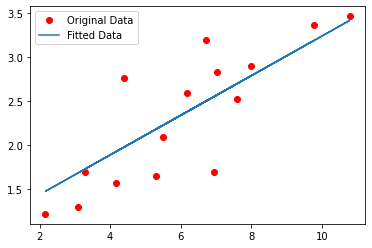

In [8]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original Data') # 트레이닝 값
plt.plot(x_train, predicted, label='Fitted Data') # 예측한 값
plt.legend() # 라벨을 나오게 한다.
plt.show()

# Save the Model Value ... ckpt
torch.save(model.state_dict(),'model.ckpt') # 모델의 weight값을 저장한다.

  
위와같이 파일이 저장된다.